In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import yt
import os

dz = 0.5 nm
dielectric is always 4nm. 

check `domain_right_edge` for total thickness and ferroelectric thickness to determine dielectric boundary

In [25]:
ds = yt.load(f"{os.environ['SCRATCH']}/bml/3D_double_hyst/plt00003000/")

yt : [INFO     ] 2023-02-13 16:40:55,021 Parameters: current_time              = 1.1999999999999762e-09
yt : [INFO     ] 2023-02-13 16:40:55,022 Parameters: domain_dimensions         = [64 64 18]
yt : [INFO     ] 2023-02-13 16:40:55,023 Parameters: domain_left_edge          = [-1.6e-08 -1.6e-08  0.0e+00]
yt : [INFO     ] 2023-02-13 16:40:55,024 Parameters: domain_right_edge         = [1.6e-08 1.6e-08 9.0e-09]


In [40]:
ad = ds.all_data()
#P = ad['boxlib', 'P'].to_ndarray().reshape(ds.domain_dimensions)
P = ad['boxlib', 'P'].to_ndarray().reshape((64, 64, 18))

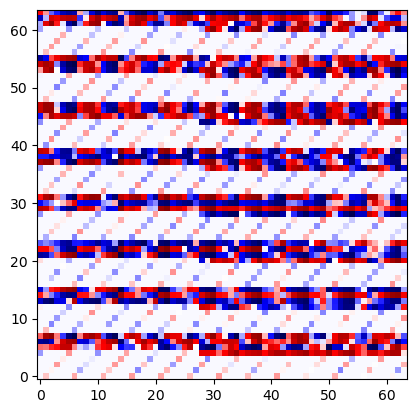

In [41]:
plt.imshow(P[:, :, 10], cmap='seismic', origin='lower')

In [ ]:
data_dir = f"{os.environ['SCRATCH']}/bml/pm5V"
Pzs_tmp = list()
names = list()

for i in sorted(glob.glob(f"{data_dir}/5.0nm/plt*/")):
    ds = yt.load(i)
    name = i[i.find('plt')+3:-1]
    names.append(name)
    ad = ds.all_data()
    Pz = ad['boxlib', 'Pz'].to_ndarray().reshape(ds.domain_dimensions)
    Pzs_tmp.append(Pz[:, 0, 8:])
    

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(20, 10), sharex=True, sharey=True)

for Pz, ax, name in zip(Pzs_tmp, axes.ravel(), names):
    plot_Pz(Pz, ax=ax, name=name)

plt.tight_layout()
#plt.savefig('test_viz.10nm.png')

In [ ]:
Pzs[18].shape

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(20, 10), sharex=True, sharey=True)

for Pz, ax, name in zip(Pzs[18], axes.ravel(), names):
    plot_Pz(Pz, ax=ax, name=name)

plt.tight_layout()
#plt.savefig('test_viz.10nm.png')

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(20, 10), sharex=True, sharey=True)

for Pz, ax, name in zip(Pzs[8], axes.ravel(), names):
    plot_Pz(Pz, ax=ax, name=name)

plt.tight_layout()
#plt.savefig('test_viz.10nm.png')

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(20, 10), sharex=True)

Pvar = list()
for Pz, ax, name in zip(Pzs, axes.ravel(), names):
    Pz = Pz.ravel()
    ax.hist(Pz, bins=30)
    Pvar.append(Pz.var())
    ax.set_title('Var = %.4g, $log(Var)$ = %.4g' % (Pvar[-1], np.log10(Pvar[-1])))
Pvar = np.array(Pvar)
plt.tight_layout()
#plt.savefig('test_viz.5nm.png')

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(20, 10))

Pvar = list()
for Pz, ax, name in zip(Pzs, axes.ravel(), names):
    Pz = Pz.ravel()
    ax.hist(Pz, bins=30)
    Pvar.append(Pz.var())
    ax.set_title(f'Var = {Pvar[-1]:.4g}')
Pvar = np.array(Pvar)
plt.tight_layout()
#plt.savefig('test_viz.5nm.png')

In [ ]:
plt.plot(Pvar)

In [ ]:
data_dir = f"{os.environ['SCRATCH']}/bml/pm5V"
Pzs = list()
names = list()
for i in sorted(glob.glob("{dat_dir}/5.0nm/plt*/")):
    ds = yt.load(i)
    name = i[i.find('plt')+3:-1]
    names.append(name)
    ad = ds.all_data()
    Pz = ad['boxlib', 'Pz'].to_ndarray().reshape(ds.domain_dimensions)
    Pzs.append(Pz[:, 0, 8:])
    